In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df=pd.read_csv("Diet Recommendation(Project).csv")

In [4]:
df

,Timestamp,Please enter your name,What is your age?,What is your Gender?,What is your Height?(in cm),What is your Weight?(in kg),"If known, enter your body fat percentage(%)",How physically active are you on a daily basis?,Do you have diabetes?,Do you have high or low blood pressure?,How many hours do you sleep daily on average?,Are you lactose intolerant?,Do you follow a vegetarian or non-vegetarian diet?,How many meals do you eat per day (on average)?,Any other medical conditions we should consider?,Email address
0,29/06/2025 08:00:45,Phaneendra,26,Male,177.8,95.0,30.0,Sedentary (little or no exercise),No,Normal,5.0,No,Non-vegetarian,3,NaN,phaneendrasunny1@gmail.com
1,29/06/2025 08:21:10,Vicky,24,Male,170.0,65.0,NaN,Sedentary (little or no exercise),No,Normal,6.0,No,Non-vegetarian,3,NaN,vickygandamalla176@gmail.com
2,29/06/2025 08:24:48,Uneendra Chintala,23,Male,179.0,111.0,NaN,Lightly active (light exercise 1–3 days/week),No,Normal,5.0,No,Non-vegetarian,4,No,uneendrachintala@gmail.com
3,29/06/2025 08:42:56,K Chandana,23,Female,5.2,42.0,NaN,Sedentary (little or no exercise),No,Normal,10.0,No,Non-vegetarian,2,No,chandanar640@gmail.com
4,29/06/2025 08:46:39,Naveena,23,Female,154.0,45.0,NaN,Sedentary (little or no exercise),No,Normal,9.0,No,Non-vegetarian,3,NaN,tnaveenareddy06793@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,11/07/2025 21:45:12,Pindi Ramulu,36,Male,5.3,68.0,NaN,Sedentary (little or no exercise),No,Normal,8.0,No,Non-vegetarian,3,NaN,pindir999@gmail.com
542,12/07/2025 21:25:03,Kilagana Aswiini,28,Female,5.2,75.0,NaN,Extra active (very intense physical job or tra...,No,Normal,8.0,No,Non-vegetarian,2,NaN,kolaganaaswini@gmail.com
543,12/07/2025 21:34:51,Shanmukharao,36,Male,158.0,61.0,NaN,Lightly active (light exercise 1–3 days/week),No,Normal,6.0,No,Non-vegetarian,2,No,ksrao119@gmail.com
544,13/07/2025 19:45:26,Seshu,30,Male,5.3,60.0,NaN,Very active (hard exercise 6–7 days/week),No,Normal,6.0,Yes,Non-vegetarian,3,NaN,seshugdm50@gmail.com


### Data Cleaning

In [5]:
df.columns

Index(['Timestamp', 'Please enter your name', 'What is your age?',
       'What is your Gender?', 'What  is your Height?(in cm)',
       'What is your Weight?(in kg)',
       'If known, enter your body fat percentage(%)',
       '  How physically active are you on a daily basis?  ',
       'Do you have diabetes?', '  Do you have high or low blood pressure?  ',
       '  How many hours do you sleep daily on average?  ',
       'Are you lactose intolerant?',
       '  Do you follow a vegetarian or non-vegetarian diet?  ',
       'How many meals do you eat per day (on average)?  ',
       'Any other medical conditions we should consider?', 'Email address'],
      dtype='object')

In [6]:
# changing column names
df.columns=["Time","name","age","gender","height","weight","body fat","exercise","diabetic","bp","sleep hours","lactose intolerant","food type","meals","conditions","mail"]

In [8]:
# time, name and mail are not required for our analysis, so we are removing it
df.drop(columns=["Time","name",'mail'],inplace=True)

In [9]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'body fat', 'exercise', 'diabetic',
       'bp', 'sleep hours', 'lactose intolerant', 'food type', 'meals',
       'conditions'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 546 non-null    int64  
 1   gender              546 non-null    object 
 2   height              546 non-null    float64
 3   weight              546 non-null    float64
 4   body fat            85 non-null     float64
 5   exercise            546 non-null    object 
 6   diabetic            546 non-null    object 
 7   bp                  546 non-null    object 
 8   sleep hours         546 non-null    float64
 9   lactose intolerant  546 non-null    object 
 10  food type           546 non-null    object 
 11  meals               546 non-null    int64  
 12  conditions          352 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 55.6+ KB


In [11]:
# age,meals,height, weight,body fat,sleep hours are numerical values while other columns are categorical values

In [12]:
df.describe()

,age,height,weight,body fat,sleep hours,meals
count,546.000000,546.000000,546.000000,85.000000,546.000000,546.000000
mean,25.787546,108.806111,66.749084,25.349412,7.374542,2.800366
std,7.961300,78.967030,29.547883,17.667603,1.682973,0.770130
min,3.000000,4.000000,5.300000,5.000000,1.000000,1.000000
25%,22.000000,5.625000,55.000000,10.000000,7.000000,2.000000
50%,24.000000,158.000000,65.000000,20.000000,7.000000,3.000000
75%,27.000000,170.688000,75.000000,35.000000,8.000000,3.000000
max,109.000000,280.000000,650.000000,60.000000,24.000000,7.000000


In [13]:
df["weight"].describe()

count    546.000000
mean      66.749084
std       29.547883
min        5.300000
25%       55.000000
50%       65.000000
75%       75.000000
max      650.000000
Name: weight, dtype: float64

In [14]:
# weight is our target column ,this is a classification problem

In [15]:
# checking for null values
df.isnull().sum()

age                     0
gender                  0
height                  0
weight                  0
body fat              461
exercise                0
diabetic                0
bp                      0
sleep hours             0
lactose intolerant      0
food type               0
meals                   0
conditions            194
dtype: int64

In [16]:
df["body fat"].unique()

array([30. ,  nan, 12. , 57. , 60. , 18. , 50. , 10. , 20. ,  5. , 45. ,
       15. , 43. ,  8. , 10.7, 35. , 55. , 13. , 24. , 40. , 28. , 23. ,
       25. , 32. ,  9. , 36. ,  6. , 17. , 48. ,  7. ])

In [17]:
# since body fat is a categorical value in general filling null values with mode
df["body fat"]=df["body fat"].fillna(df["body fat"].mode()[0])

In [18]:
df["body fat"].isnull().sum()

0

In [19]:
df["conditions"].unique()

array([nan, 'No', 'Allergies', '1', 'Etc', 'Allergies ', '-',
       'No, esonophilis low impact', 'no', 'Na', 'Cancer',
       'Fungus Infection', 'Nil', 'Hysterectomy done', 'Fatty liver',
       'Tonsillitis', 'NO', 'No disease ', 'Thyroid ', 'No\n',
       'Headache ', "No I don't have any ", 'Noo', 'N.A.', ' No', 'No ',
       'Thyroid', 'Non', 'Pcod', 'Pcos', 'etc', 'Asthama', 'None.',
       'Nil ', 'No.', 'Body pain like back pain neck pain',
       'Kidney issues', 'Nothing ', 'Skin allergies ', 'No condition ',
       'Thyroid pcos', '🤷🏻', 'Gastric', 'Nothing', 'thyroid', 'PCOS',
       'Uric acid ', "Pcos, protein 's deficiency", 'Hypo Thyroidism',
       'Dust allergy ', 'Ntng ', 'All good ', 'Na ', 'Skin allergy ',
       'PCOD', 'Gas', 'Brinjal', '2', '5', 'Allergy ', 'Nop', 'Sinus ',
       'Thyroid and PCOS', 'PCO got triggered but it’s under control..',
       'No disease', 'DustAllergies ', 'Nope', 'NTG ', 'Asthama ', 'N/a',
       'PCOD ', 'pcos', 'nothing', 'Nope ',

In [20]:
import regex as re
def fin(n):
    x=re.findall("\w+",str(n))
    if len(x)>0:
        return x[0]
    else:
        return n

In [21]:
df["conditions"]=df["conditions"].apply(fin)

In [22]:
df["conditions"].unique()

array(['nan', 'No', 'Allergies', '1', 'Etc', '-', 'no', 'Na', 'Cancer',
       'Fungus', 'Nil', 'Hysterectomy', 'Fatty', 'Tonsillitis', 'NO',
       'Thyroid', 'Headache', 'Noo', 'N', 'Non', 'Pcod', 'Pcos', 'etc',
       'Asthama', 'None', 'Body', 'Kidney', 'Nothing', 'Skin', '🤷🏻',
       'Gastric', 'thyroid', 'PCOS', 'Uric', 'Hypo', 'Dust', 'Ntng',
       'All', 'PCOD', 'Gas', 'Brinjal', '2', '5', 'Allergy', 'Nop',
       'Sinus', 'PCO', 'DustAllergies', 'Nope', 'NTG', 'pcos', 'nothing',
       'Iron', 'Bone'], dtype=object)

In [23]:
def finn(n):
    if n=='🤷🏻' or n=="-":
        return np.nan
    else:
        return n

In [24]:
df["conditions"]=df["conditions"].apply(finn)

In [25]:
df["conditions"].unique()

array(['nan', 'No', 'Allergies', '1', 'Etc', nan, 'no', 'Na', 'Cancer',
       'Fungus', 'Nil', 'Hysterectomy', 'Fatty', 'Tonsillitis', 'NO',
       'Thyroid', 'Headache', 'Noo', 'N', 'Non', 'Pcod', 'Pcos', 'etc',
       'Asthama', 'None', 'Body', 'Kidney', 'Nothing', 'Skin', 'Gastric',
       'thyroid', 'PCOS', 'Uric', 'Hypo', 'Dust', 'Ntng', 'All', 'PCOD',
       'Gas', 'Brinjal', '2', '5', 'Allergy', 'Nop', 'Sinus', 'PCO',
       'DustAllergies', 'Nope', 'NTG', 'pcos', 'nothing', 'Iron', 'Bone'],
      dtype=object)

In [26]:
def rt(n):
    g=re.findall("^N.*",str(n))
    if len(g)>0:
        return np.nan
    else:
        return n

In [27]:
df["conditions"]=df["conditions"].apply(rt)

In [28]:
def tr(n):
    h=re.findall("\d",str(n))
    if len(h)>0:
        return np.nan
    else:
        return n

In [29]:
df["conditions"]=df["conditions"].apply(tr)

In [30]:
df["conditions"].unique()

array(['nan', nan, 'Allergies', 'Etc', 'no', 'Cancer', 'Fungus',
       'Hysterectomy', 'Fatty', 'Tonsillitis', 'Thyroid', 'Headache',
       'Pcod', 'Pcos', 'etc', 'Asthama', 'Body', 'Kidney', 'Skin',
       'Gastric', 'thyroid', 'PCOS', 'Uric', 'Hypo', 'Dust', 'All',
       'PCOD', 'Gas', 'Brinjal', 'Allergy', 'Sinus', 'PCO',
       'DustAllergies', 'pcos', 'nothing', 'Iron', 'Bone'], dtype=object)

In [31]:
def fun(n):
    if n=="no" or n=="nan" or n=="nothing":
        return np.nan
    else:
        return n


In [32]:
df["conditions"]=df["conditions"].apply(fun)

In [33]:
df["conditions"].unique()

array([nan, 'Allergies', 'Etc', 'Cancer', 'Fungus', 'Hysterectomy',
       'Fatty', 'Tonsillitis', 'Thyroid', 'Headache', 'Pcod', 'Pcos',
       'etc', 'Asthama', 'Body', 'Kidney', 'Skin', 'Gastric', 'thyroid',
       'PCOS', 'Uric', 'Hypo', 'Dust', 'All', 'PCOD', 'Gas', 'Brinjal',
       'Allergy', 'Sinus', 'PCO', 'DustAllergies', 'pcos', 'Iron', 'Bone'],
      dtype=object)

In [34]:
df["conditions"]=df["conditions"].apply(lambda x: np.nan if (x=='Etc'or x=='etc' or x=="Brinjal" or x=='All') else x)

In [35]:
df["conditions"].unique()

array([nan, 'Allergies', 'Cancer', 'Fungus', 'Hysterectomy', 'Fatty',
       'Tonsillitis', 'Thyroid', 'Headache', 'Pcod', 'Pcos', 'Asthama',
       'Body', 'Kidney', 'Skin', 'Gastric', 'thyroid', 'PCOS', 'Uric',
       'Hypo', 'Dust', 'PCOD', 'Gas', 'Allergy', 'Sinus', 'PCO',
       'DustAllergies', 'pcos', 'Iron', 'Bone'], dtype=object)

In [36]:
df["conditions"]=df["conditions"].fillna(df["conditions"].mode()[0])


In [37]:
df["conditions"].isnull().sum()

0

In [38]:
#converting age to categorical value as there are descrete numbers
# age
df["age"].unique()

array([ 26,  24,  23,  25,  38,  20,  31,  29,  28,  21,  27,  18,  19,
        33,  54,  22,  32,  35,  37,  30,  44,  17,  48,  16,   3,  57,
        53,  47,  42,  45,  36,  60,  56,  43,  39,  51,  41,  49,  52,
        34,  50,  15,  65,  40, 109], dtype=int64)

In [39]:
df["age"].describe()

count    546.000000
mean      25.787546
std        7.961300
min        3.000000
25%       22.000000
50%       24.000000
75%       27.000000
max      109.000000
Name: age, dtype: float64

In [40]:
df["age"]=df["age"].apply(lambda x: "young" if x<22 else "middle_aged" if x<28 else "high")

In [41]:
df["age"].unique()

array(['middle_aged', 'high', 'young'], dtype=object)

In [42]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'body fat', 'exercise', 'diabetic',
       'bp', 'sleep hours', 'lactose intolerant', 'food type', 'meals',
       'conditions'],
      dtype='object')

In [43]:
# gender
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [44]:
# height
df["height"].unique()

array([177.8   , 170.    , 179.    ,   5.2   , 154.    ,   5.5   ,
       180.    , 174.    , 183.    ,   5.7   , 186.    ,   5.6   ,
       176.    , 172.    , 175.    , 156.    , 161.    ,   5.    ,
       182.    , 160.    , 152.    , 168.    , 155.    , 170.688 ,
       169.    , 200.    , 188.    , 165.1   , 157.    , 165.    ,
       153.    ,   5.3   , 150.    ,   5.4   , 181.    ,   6.1   ,
         5.11  , 162.    , 178.    , 163.    ,   6.    ,   4.8   ,
       158.    ,   5.8   , 149.    , 159.    ,  54.    , 185.    ,
         5.1   , 139.    , 152.4   ,   4.    ,  15.    ,   6.8   ,
       164.    , 166.    , 167.    , 177.    ,   6.5   , 172.72  ,
       189.    , 167.64  , 170.7   ,   5.9   , 155.448 , 173.    ,
        62.    , 188.976 ,   4.5   , 171.    , 181.3   ,   4.53  ,
       149.86  , 190.    , 187.    , 137.16  ,   4.1   , 173.7   ,
       148.    , 151.    , 140.    , 120.    , 161.5   , 147.    ,
         5.12  ,   4.9   , 145.    , 250.    ,   4.11  , 155.7

In [45]:
# converting all the values to cm
def feet_to_cm(n):
    m=str(round(n*10))
    x=[]
    if len(m)==2:
        for i in m:
            x.append(int(i))
        return x[0]*30.48+x[1]*2.54
    else:
        return n        

In [46]:
n=5.4
feet_to_cm(n)

162.56

In [47]:
df["height"]=df["height"].apply(feet_to_cm)

In [48]:
df["height"].unique()

array([177.8   , 170.    , 179.    , 157.48  , 154.    , 165.1   ,
       180.    , 174.    , 183.    , 170.18  , 186.    , 167.64  ,
       176.    , 172.    , 175.    , 156.    , 161.    , 152.4   ,
       182.    , 160.    , 152.    , 168.    , 155.    , 170.688 ,
       169.    , 200.    , 188.    , 157.    , 165.    , 153.    ,
       160.02  , 150.    , 162.56  , 181.    , 185.42  , 154.94  ,
       162.    , 178.    , 163.    , 182.88  , 142.24  , 158.    ,
       172.72  , 149.    , 159.    ,  54.    , 185.    , 139.    ,
       121.92  ,  15.    , 203.2   , 164.    , 166.    , 167.    ,
       177.    , 195.58  , 189.    , 167.64  , 170.7   , 175.26  ,
       155.448 , 173.    ,  62.    , 188.976 , 134.62  , 171.    ,
       181.3   , 149.86  , 190.    , 187.    , 137.16  , 124.46  ,
       173.7   , 148.    , 151.    , 140.    , 120.    , 161.5   ,
       147.    , 144.78  , 145.    , 250.    , 155.7528,  55.    ,
       163.78  , 129.54  , 125.    ,  14.986 , 187.96  , 198. 

In [50]:
# weight
df["weight"].unique()

array([ 95. ,  65. , 111. ,  42. ,  45. ,  46. ,  89. ,  60. ,  80. ,
        75. ,  50. ,  94. ,  78. ,  68. ,  63. ,  64. ,  54. ,  59. ,
       110. ,  62. ,  58. ,  85. ,  69. ,  90. , 100. ,  40. ,  71. ,
        53. ,  84. ,  76. ,  77. ,  70. ,  72. ,  55. ,  73. ,  47. ,
        97. ,  61. ,  74. ,  36. ,  48. ,  98. ,  70.6,  73.5,  52. ,
        56. ,  87. ,  38. ,  66. ,  83. ,  57. ,  84.5,  35. ,  67. ,
        49. ,  51. ,  82. , 105. ,  96. ,   5.6,   5.3,  92. , 102. ,
        43. ,  41. ,  79. ,  93. ,   6. ,  88. ,  44. ,  32. ,  60.5,
        86. ,  81. ,  99. , 130. , 127. , 106. ,  39. , 650. ])

In [51]:
# some values are single digit number weight cant be of single digit in humans
def conv(n):
    m=n*10
    if len(str(round(m)))<3:
        return np.nan
    else:
        return n

In [52]:
df["weight"]=df["weight"].apply(conv)

<Axes: ylabel='weight'>

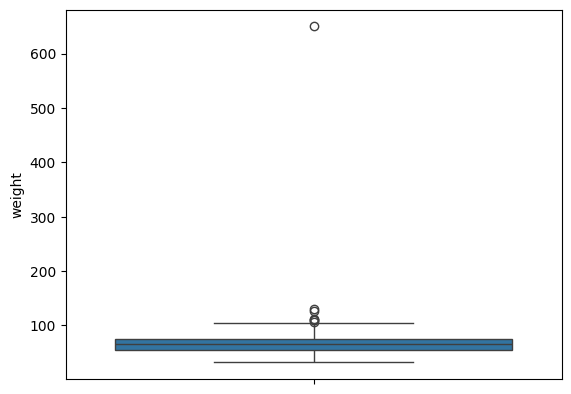

In [53]:
# since it is numerical column checking for outliers for filling the null values
sns.boxplot(df["weight"])

In [54]:
# there are some  outliers so filling outliers with median
df["weight"]=df["weight"].fillna(df["weight"].median())

In [55]:
df["weight"].isnull().sum()

0

In [56]:
def weightt(n):
    return round(n)

In [57]:
df["weight"]=df["weight"].apply(weightt)

In [58]:
df["weight"].unique()

array([ 95,  65, 111,  42,  45,  46,  89,  60,  80,  75,  50,  94,  78,
        68,  63,  64,  54,  59, 110,  62,  58,  85,  69,  90, 100,  40,
        71,  53,  84,  76,  77,  70,  72,  55,  73,  47,  97,  61,  74,
        36,  48,  98,  52,  56,  87,  38,  66,  83,  57,  35,  67,  49,
        51,  82, 105,  96,  92, 102,  43,  41,  79,  93,  88,  44,  32,
        86,  81,  99, 130, 127, 106,  39, 650], dtype=int64)

In [59]:
# body fat
df["body fat"].unique()

array([30. , 10. , 12. , 57. , 60. , 18. , 50. , 20. ,  5. , 45. , 15. ,
       43. ,  8. , 10.7, 35. , 55. , 13. , 24. , 40. , 28. , 23. , 25. ,
       32. ,  9. , 36. ,  6. , 17. , 48. ,  7. ])

In [60]:
df["body fat"].describe()

count    546.000000
mean      12.389560
std        8.895812
min        5.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       60.000000
Name: body fat, dtype: float64

In [61]:
df["body fat"]=df["body fat"].apply(lambda x:"low" if x<10 else "good" if x<22 else "high")

In [62]:
#exercise
df["exercise"].unique()

array(['Sedentary (little or no exercise)',
       'Lightly active (light exercise 1–3 days/week)',
       'Moderately active (moderate exercise 3–5 days/week)',
       'Very active (hard exercise 6–7 days/week)',
       'Extra active (very intense physical job or training)'],
      dtype=object)

In [63]:
df["exercise"]=df["exercise"].apply(lambda x:"little" if x=='Sedentary (little or no exercise)' else "light" if x=="Moderately active (moderate exercise 3–5 days/week)" else "moderate" if x=="Moderately active (moderate exercise 3–5 days/week)" else "hard" if x=="Very active (hard exercise 6–7 days/week)" else "very intense")

In [64]:
df["exercise"].unique()

array(['little', 'very intense', 'light', 'hard'], dtype=object)

In [65]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'body fat', 'exercise', 'diabetic',
       'bp', 'sleep hours', 'lactose intolerant', 'food type', 'meals',
       'conditions'],
      dtype='object')

In [66]:
df["diabetic"].unique()

array(['No', 'Yes'], dtype=object)

In [67]:
df["bp"].unique()

array(['Normal', 'High', 'Low'], dtype=object)

In [68]:
df["sleep hours"].unique()

array([ 5. ,  6. , 10. ,  9. ,  8. ,  7. ,  4. ,  2. ,  6.5,  7.5, 12. ,
        1. , 24. ,  3. , 11. , 16. ])

In [69]:
df["lactose intolerant"].unique()

array(['No', 'Yes'], dtype=object)

In [70]:
df["food type"].unique()

array(['Non-vegetarian', 'Vegetarian', 'Vegan'], dtype=object)

In [71]:
df["meals"].unique()

array([3, 4, 2, 1, 5, 6, 7], dtype=int64)

In [72]:
df.isnull().sum()

age                   0
gender                0
height                0
weight                0
body fat              0
exercise              0
diabetic              0
bp                    0
sleep hours           0
lactose intolerant    0
food type             0
meals                 0
conditions            0
dtype: int64

In [73]:
# no null values

In [74]:
# checking for duplicates
df.duplicated().sum()

0

In [75]:
# a person can have same attributes, so not deleting columns

### Univariate analysis

In [76]:
# age
df["age"].value_counts()

age
middle_aged    324
young          114
high           108
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='count'>

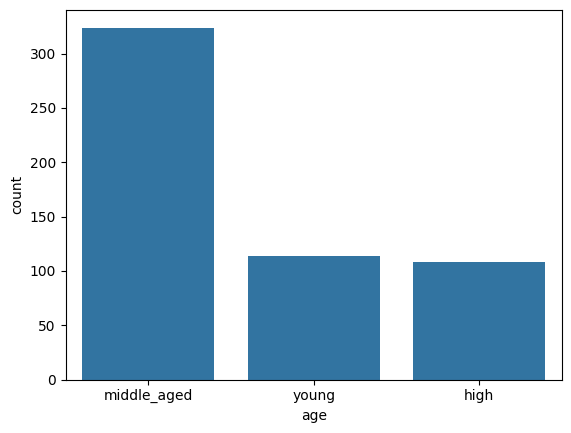

In [77]:
sns.barplot(df["age"].value_counts())

In [78]:
# gender
df["gender"].value_counts()

gender
Male      361
Female    185
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

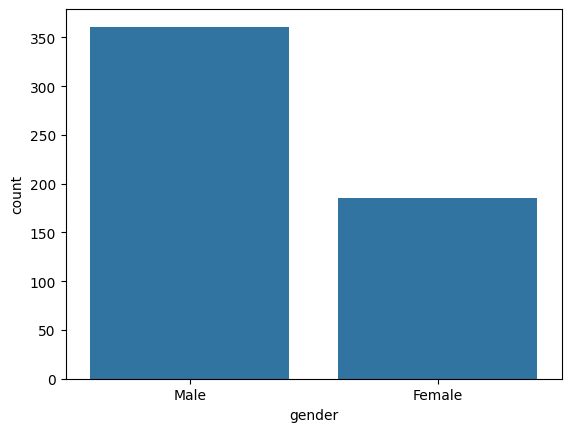

In [79]:
sns.barplot(df["gender"].value_counts())

In [80]:
#height
df["height"].unique()

array([177.8   , 170.    , 179.    , 157.48  , 154.    , 165.1   ,
       180.    , 174.    , 183.    , 170.18  , 186.    , 167.64  ,
       176.    , 172.    , 175.    , 156.    , 161.    , 152.4   ,
       182.    , 160.    , 152.    , 168.    , 155.    , 170.688 ,
       169.    , 200.    , 188.    , 157.    , 165.    , 153.    ,
       160.02  , 150.    , 162.56  , 181.    , 185.42  , 154.94  ,
       162.    , 178.    , 163.    , 182.88  , 142.24  , 158.    ,
       172.72  , 149.    , 159.    ,  54.    , 185.    , 139.    ,
       121.92  ,  15.    , 203.2   , 164.    , 166.    , 167.    ,
       177.    , 195.58  , 189.    , 167.64  , 170.7   , 175.26  ,
       155.448 , 173.    ,  62.    , 188.976 , 134.62  , 171.    ,
       181.3   , 149.86  , 190.    , 187.    , 137.16  , 124.46  ,
       173.7   , 148.    , 151.    , 140.    , 120.    , 161.5   ,
       147.    , 144.78  , 145.    , 250.    , 155.7528,  55.    ,
       163.78  , 129.54  , 125.    ,  14.986 , 187.96  , 198. 

<Axes: ylabel='height'>

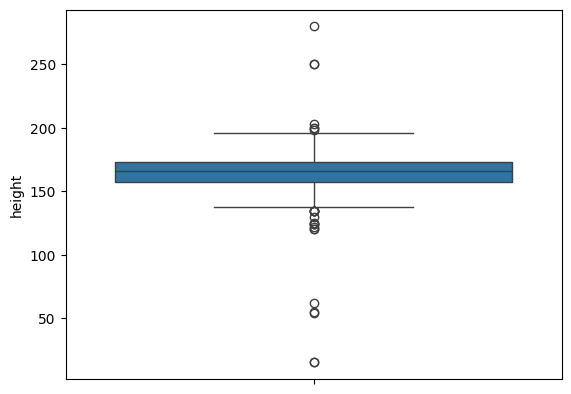

In [81]:
# checking for outliers
sns.boxplot(df["height"])

In [82]:
#no outliers

In [83]:
# checking for gaussian
from scipy.stats import anderson
def gaussian_check(n):
    sns.distplot(n,kde=True)
    plt.show()
    stats.probplot(n,dist="norm",plot=plt)
    plt.show()
    x=anderson(n)
    print(x.statistic)
    print(x.critical_values)
    if x.statistic<x.critical_values[2]:
        return "gaussian"
    else:
        return "non gaussian"

C:\Users\pc\AppData\Local\Temp\ipykernel_8620\2917978411.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n,kde=True)


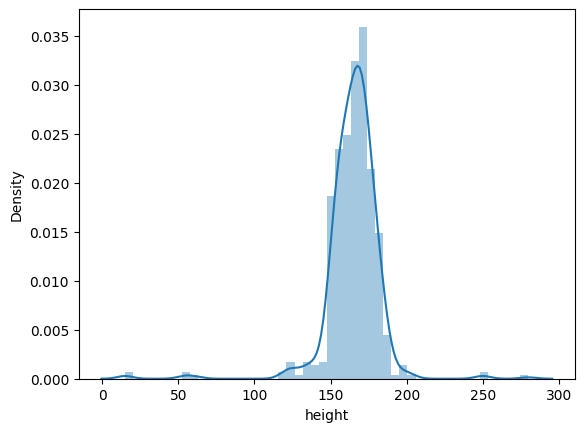

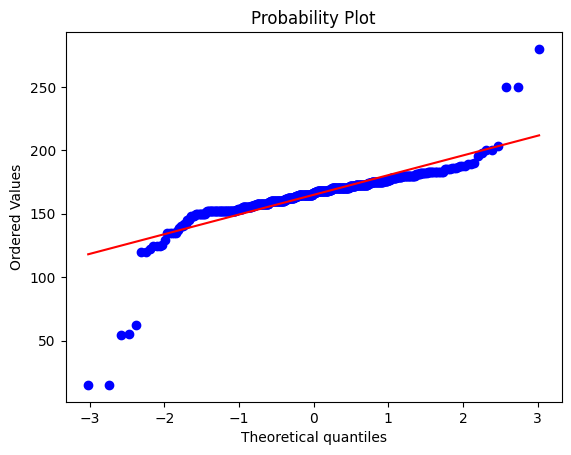

24.87026108277439
[0.572 0.651 0.781 0.911 1.084]


'non gaussian'

In [84]:
gaussian_check(df['height'])

In [85]:
# the distribution of height is non gaussian

In [86]:
# wieght
df["weight"].unique()

array([ 95,  65, 111,  42,  45,  46,  89,  60,  80,  75,  50,  94,  78,
        68,  63,  64,  54,  59, 110,  62,  58,  85,  69,  90, 100,  40,
        71,  53,  84,  76,  77,  70,  72,  55,  73,  47,  97,  61,  74,
        36,  48,  98,  52,  56,  87,  38,  66,  83,  57,  35,  67,  49,
        51,  82, 105,  96,  92, 102,  43,  41,  79,  93,  88,  44,  32,
        86,  81,  99, 130, 127, 106,  39, 650], dtype=int64)

In [87]:
df["weight"].describe()

count    546.000000
mean      67.075092
std       29.196328
min       32.000000
25%       55.000000
50%       65.000000
75%       75.000000
max      650.000000
Name: weight, dtype: float64

<Axes: ylabel='weight'>

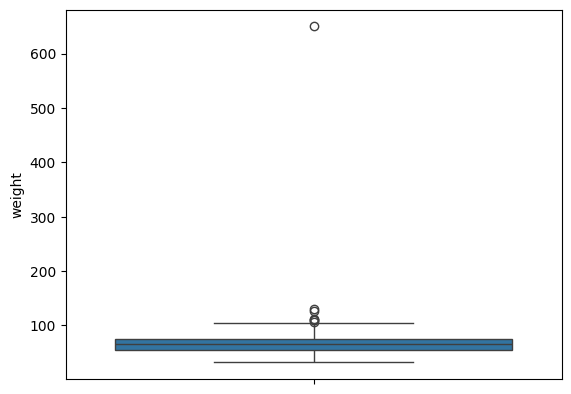

In [88]:
# checking for outliers
sns.boxplot(df["weight"])

C:\Users\pc\AppData\Local\Temp\ipykernel_8620\2917978411.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n,kde=True)


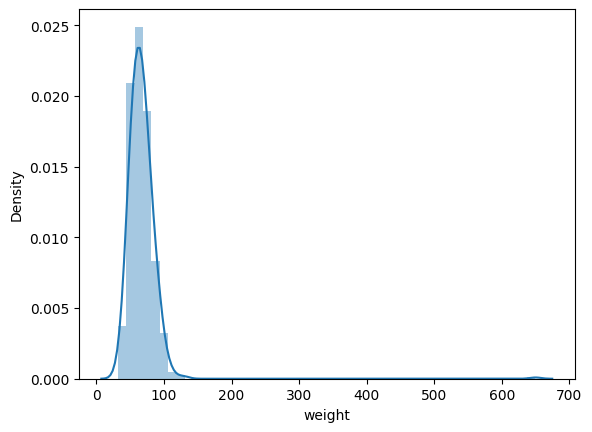

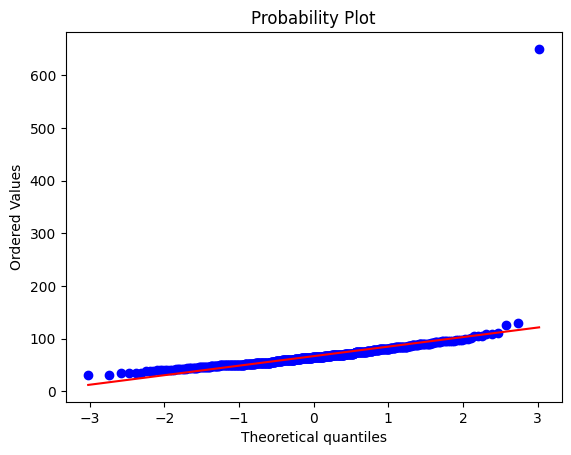

43.56177715392778
[0.572 0.651 0.781 0.911 1.084]


'non gaussian'

In [89]:
# checking for gaussian
gaussian_check(df["weight"])

In [90]:
# the distribution is gaussian and have outliers, so filling outliers with iqr
def Outliers_handle(n):
    q1=np.percentile(df["weight"],25)
    q3=np.percentile(df["weight"],75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    if n<lb:
        return lb
    elif n>ub:
        return ub
    else:
        return n

In [91]:
df["weight"]=df["weight"].apply(Outliers_handle)

<Axes: ylabel='weight'>

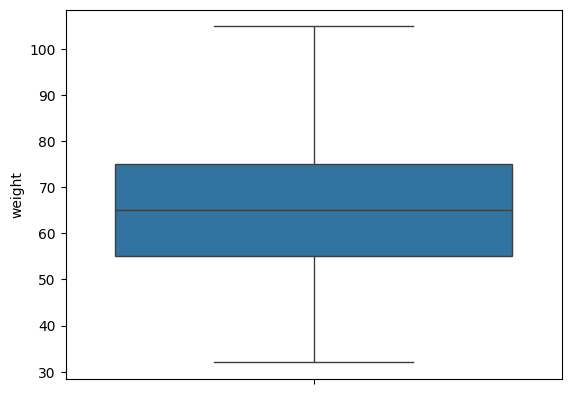

In [92]:
sns.boxplot(df["weight"])

In [93]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'body fat', 'exercise', 'diabetic',
       'bp', 'sleep hours', 'lactose intolerant', 'food type', 'meals',
       'conditions'],
      dtype='object')

In [94]:
# body fat
df["body fat"].unique()

array(['high', 'good', 'low'], dtype=object)

In [95]:
df["body fat"].value_counts()

body fat
good    491
high     40
low      15
Name: count, dtype: int64

<Axes: xlabel='body fat', ylabel='count'>

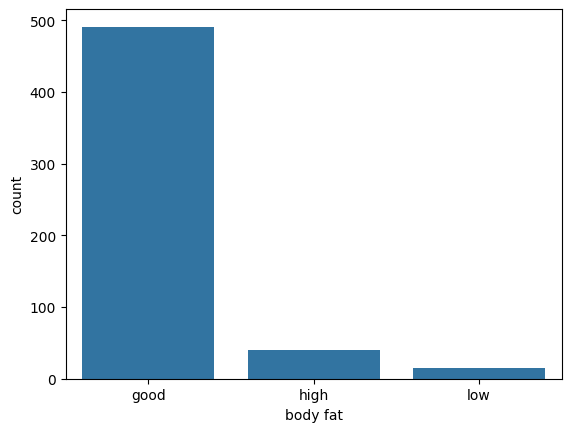

In [96]:
sns.barplot(df["body fat"].value_counts())

In [97]:
# maximum people have good body fat percentage

In [98]:
# exercise
df["exercise"].unique()

array(['little', 'very intense', 'light', 'hard'], dtype=object)

In [99]:
df["exercise"].value_counts()

exercise
very intense    169
little          147
light           140
hard             90
Name: count, dtype: int64

<Axes: xlabel='exercise', ylabel='count'>

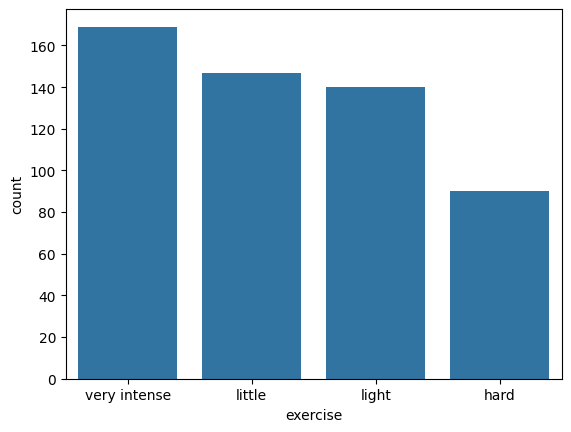

In [100]:
sns.barplot(df["exercise"].value_counts())

In [101]:
# maximum people are always exercising

In [102]:
# diabetic
df["diabetic"].unique()

array(['No', 'Yes'], dtype=object)

<Axes: xlabel='diabetic', ylabel='count'>

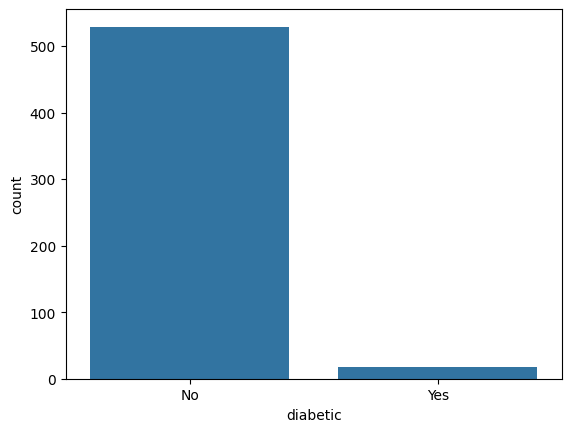

In [103]:
sns.barplot(df["diabetic"].value_counts())

In [104]:
# maximum people dont have diabetic

In [105]:
# bp
df["bp"].value_counts()

bp
Normal    503
Low        22
High       21
Name: count, dtype: int64

<Axes: xlabel='bp', ylabel='count'>

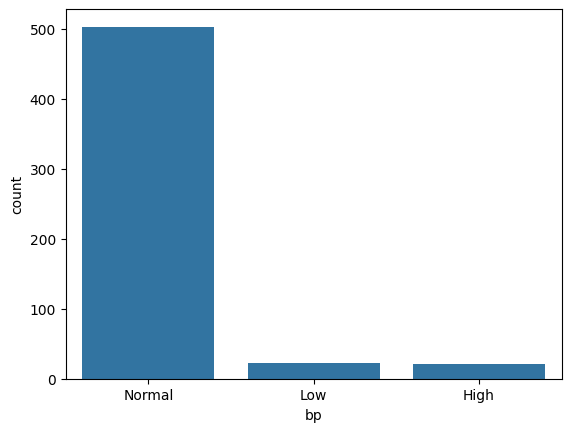

In [106]:
sns.barplot(df["bp"].value_counts())

In [107]:
# maximum people have normal bp

In [108]:
# sleep housrs
df["sleep hours"].unique()

array([ 5. ,  6. , 10. ,  9. ,  8. ,  7. ,  4. ,  2. ,  6.5,  7.5, 12. ,
        1. , 24. ,  3. , 11. , 16. ])

In [109]:
# 24 cant be a sleep hours, so removing it 
df["sleep hours"].apply(lambda x:np.nan if x==24 else x)

0       5.0
1       6.0
2       5.0
3      10.0
4       9.0
       ... 
541     8.0
542     8.0
543     6.0
544     6.0
545     NaN
Name: sleep hours, Length: 546, dtype: float64

In [110]:
df["sleep hours"].describe()

count    546.000000
mean       7.374542
std        1.682973
min        1.000000
25%        7.000000
50%        7.000000
75%        8.000000
max       24.000000
Name: sleep hours, dtype: float64

In [111]:
df["sleep hours"]=df["sleep hours"].apply(lambda x:np.nan if x==24 else x)

In [112]:
df.fillna(df["sleep hours"].mode()[0],inplace=True)

In [113]:
df["sleep hours"]=df["sleep hours"].apply(lambda x:"low" if x<=5 else "mid" if x<=8 else "high")

In [114]:
df["sleep hours"].unique()

array(['low', 'mid', 'high'], dtype=object)

In [115]:
df["sleep hours"].value_counts()

sleep hours
mid     462
high     56
low      28
Name: count, dtype: int64

<Axes: xlabel='sleep hours', ylabel='count'>

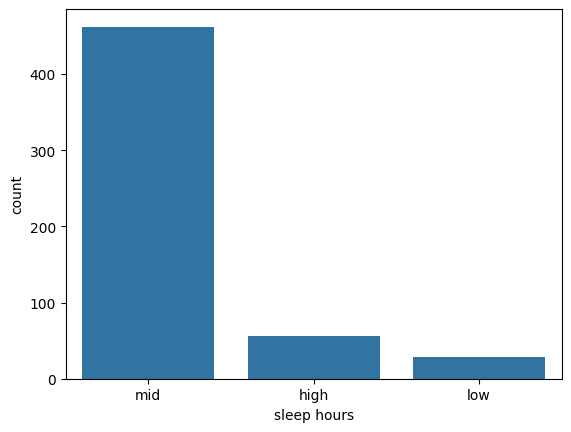

In [116]:
sns.barplot(df["sleep hours"].value_counts())

In [117]:
# maximum people sleep good

In [119]:
# lactose intolerant
df["lactose intolerant"].unique()

array(['No', 'Yes'], dtype=object)

In [120]:
df["lactose intolerant"].value_counts()

lactose intolerant
No     495
Yes     51
Name: count, dtype: int64

<Axes: xlabel='lactose intolerant', ylabel='count'>

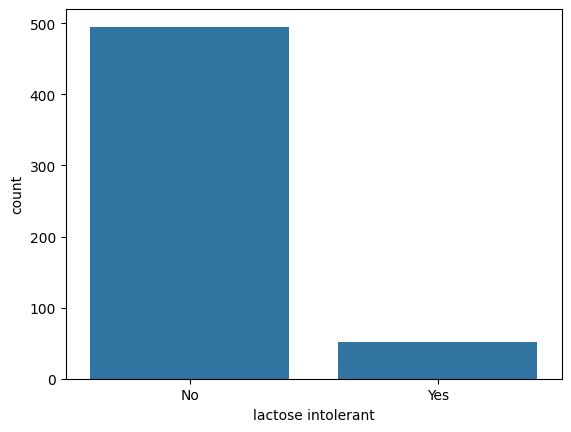

In [121]:
sns.barplot(df["lactose intolerant"].value_counts())

In [122]:
# maximum people are not lactose intolerant

In [123]:
#food type
df["food type"].unique()

array(['Non-vegetarian', 'Vegetarian', 'Vegan'], dtype=object)

In [124]:
df["food type"].value_counts()

food type
Non-vegetarian    395
Vegetarian        124
Vegan              27
Name: count, dtype: int64

<Axes: xlabel='food type', ylabel='count'>

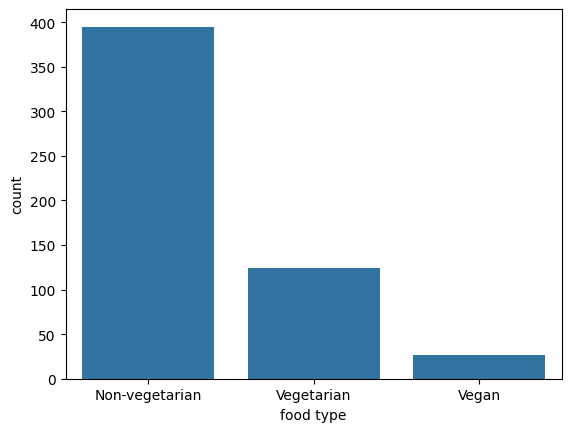

In [125]:
sns.barplot(df["food type"].value_counts())

In [126]:
# maximum people are non vegiterian

In [127]:
# meals
df["meals"].unique()

array([3, 4, 2, 1, 5, 6, 7], dtype=int64)

<Axes: xlabel='meals', ylabel='count'>

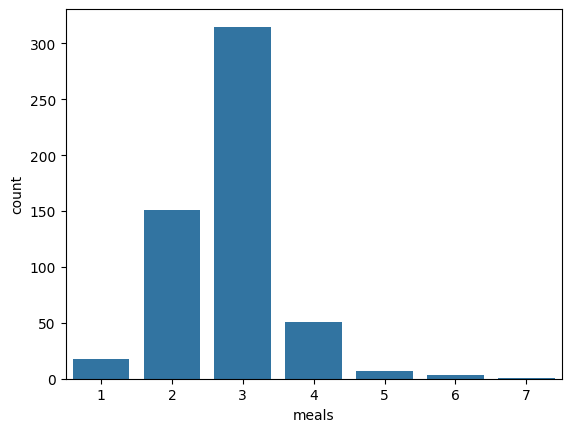

In [128]:
sns.barplot(df["meals"].value_counts())

In [129]:
# maximum people eat food 3 times

In [130]:
# conditions
df["conditions"].unique()

array(['Thyroid', 'Allergies', 'Cancer', 'Fungus', 'Hysterectomy',
       'Fatty', 'Tonsillitis', 'Headache', 'Pcod', 'Pcos', 'Asthama',
       'Body', 'Kidney', 'Skin', 'Gastric', 'thyroid', 'PCOS', 'Uric',
       'Hypo', 'Dust', 'PCOD', 'Gas', 'Allergy', 'Sinus', 'PCO',
       'DustAllergies', 'pcos', 'Iron', 'Bone'], dtype=object)

In [131]:
df["conditions"].value_counts()

conditions
Thyroid          501
Pcos               8
Allergies          4
PCOD               3
Dust               2
thyroid            2
Skin               2
Asthama            2
Gastric            2
Pcod               1
Headache           1
Iron               1
pcos               1
DustAllergies      1
PCO                1
Sinus              1
Allergy            1
Gas                1
Cancer             1
Fungus             1
Hypo               1
Uric               1
PCOS               1
Hysterectomy       1
Fatty              1
Tonsillitis        1
Kidney             1
Body               1
Bone               1
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'Thyroid'),
  Text(1, 0, 'Pcos'),
  Text(2, 0, 'Allergies'),
  Text(3, 0, 'PCOD'),
  Text(4, 0, 'Dust'),
  Text(5, 0, 'thyroid'),
  Text(6, 0, 'Skin'),
  Text(7, 0, 'Asthama'),
  Text(8, 0, 'Gastric'),
  Text(9, 0, 'Pcod'),
  Text(10, 0, 'Headache'),
  Text(11, 0, 'Iron'),
  Text(12, 0, 'pcos'),
  Text(13, 0, 'DustAllergies'),
  Text(14, 0, 'PCO'),
  Text(15, 0, 'Sinus'),
  Text(16, 0, 'Allergy'),
  Text(17, 0, 'Gas'),
  Text(18, 0, 'Cancer'),
  Text(19, 0, 'Fungus'),
  Text(20, 0, 'Hypo'),
  Text(21, 0, 'Uric'),
  Text(22, 0, 'PCOS'),
  Text(23, 0, 'Hysterectomy'),
  Text(24, 0, 'Fatty'),
  Text(25, 0, 'Tonsillitis'),
  Text(26, 0, 'Kidney'),
  Text(27, 0, 'Body'),
  Text(28, 0, 'Bone')])

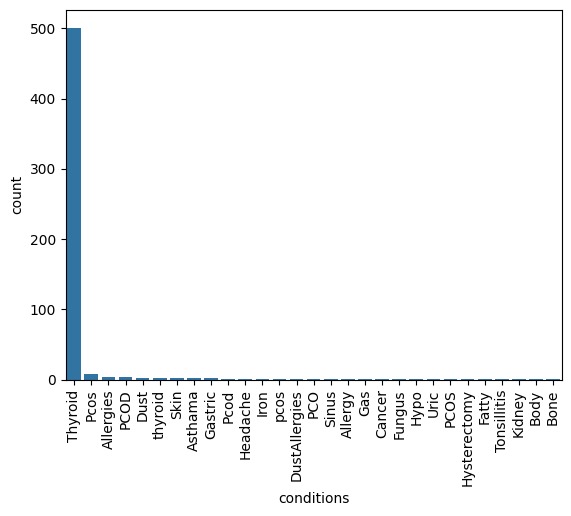

In [132]:
sns.barplot(df["conditions"].value_counts())
plt.xticks(rotation=90)

In [133]:
# maximum people have thyroid disease

In [134]:
def conve(n):
    x=n/100
    return round(x,2)

In [135]:
df["height"]=df["height"].apply(conve)

In [136]:
df["weight"]=df["weight"].astype(int)

In [139]:
# adding another column bmi
df["bmi"]=round(df["weight"]/round(df["height"]**2,2),2)

In [140]:
df["bmi"].unique()

array([  29.97,   22.49,   32.81,   17.07,   18.99,   16.91,   27.47,
         19.8 ,   17.91,   27.68,   27.57,   17.3 ,   27.17,   23.05,
         25.16,   24.38,   22.06,   22.97,   22.34,   21.12,   21.24,
         18.69,   22.15,   24.28,   31.34,   23.94,   25.11,   25.68,
         22.26,   19.53,   26.87,   36.8 ,   21.28,   28.33,   39.06,
         20.55,   14.71,   24.13,   24.89,   24.83,   12.5 ,   22.94,
         23.8 ,   19.49,   22.22,   26.99,   30.89,   18.38,   23.15,
         24.69,   28.4 ,   23.77,   24.08,   23.9 ,   19.23,   24.61,
         19.4 ,   19.61,   29.41,   25.74,   30.8 ,   24.91,   22.9 ,
         28.12,   21.65,   20.06,   32.07,   16.98,   34.56,   28.  ,
         26.32,   15.88,   23.86,   23.12,   28.36,   20.68,   25.42,
         22.36,   28.24,   15.58,   20.78,   27.34,   30.25,   22.4 ,
         27.82,   23.44,   27.07,   19.5 ,   23.66,   19.12,   19.56,
         20.97,   20.3 ,   28.71,   20.8 ,   21.74,   18.75,   15.96,
         20.35,   25

In [141]:
df["bmi"]=df["bmi"].apply(lambda x:np.nan if x>100 else x)

In [142]:
df["bmi"].isnull().sum()

5

<Axes: ylabel='bmi'>

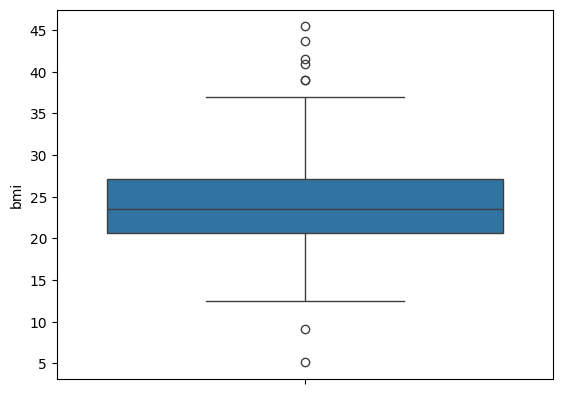

In [143]:
sns.boxplot(df["bmi"])

In [144]:
df["bmi"]=df["bmi"].fillna(df["bmi"].median())

In [145]:
df["bmi"].unique()

array([29.97, 22.49, 32.81, 17.07, 18.99, 16.91, 27.47, 19.8 , 17.91,
       27.68, 27.57, 17.3 , 27.17, 23.05, 25.16, 24.38, 22.06, 22.97,
       22.34, 21.12, 21.24, 18.69, 22.15, 24.28, 31.34, 23.94, 25.11,
       25.68, 22.26, 19.53, 26.87, 36.8 , 21.28, 28.33, 39.06, 20.55,
       14.71, 24.13, 24.89, 24.83, 12.5 , 22.94, 23.8 , 19.49, 22.22,
       26.99, 30.89, 18.38, 23.15, 24.69, 28.4 , 23.77, 24.08, 23.9 ,
       19.23, 24.61, 19.4 , 19.61, 29.41, 25.74, 30.8 , 24.91, 22.9 ,
       28.12, 21.65, 20.06, 32.07, 16.98, 34.56, 28.  , 26.32, 15.88,
       23.86, 23.12, 28.36, 20.68, 25.42, 22.36, 28.24, 15.58, 20.78,
       27.34, 30.25, 22.4 , 27.82, 23.44, 27.07, 19.5 , 23.66, 19.12,
       19.56, 20.97, 20.3 , 28.71, 20.8 , 21.74, 18.75, 15.96, 20.35,
       25.23, 23.21, 17.78, 16.89, 21.14, 35.18, 21.56, 23.53, 25.44,
       19.2 , 26.67, 19.69, 21.57, 31.2 , 16.41, 23.81, 22.53, 36.  ,
       29.32, 20.59, 33.56, 30.  , 20.22, 25.39, 27.45, 28.46, 21.77,
       26.83, 26.6 ,

### Bivariate Analysis

In [146]:
df["bmi"]=df["bmi"].apply(lambda x: "underweight" if x<18.8 else "normal weight" if x<24.91 else "overweight")

In [147]:
# checking if there is any relationship betn age and bmi
# chi 2 test
x=pd.crosstab(df["age"],df["bmi"])
chi2,p,dof,expected=stats.chi2_contingency(x)

In [148]:
p

3.2349661886083944e-07

In [149]:
# less than 5% so,they are  dependent on each other

In [150]:
# checking if there is any reln betn gender and height
y=pd.crosstab(df["gender"],df["bmi"])
chi2,p,dof,expected=stats.chi2_contingency(y)

In [151]:
p

0.28363026383481116

In [152]:
# less than 5% so there is a reln betn gender and bmi

In [153]:
# checking if there is any reln betn height and bmi
# annova test
d1=df[df["bmi"]=="underweight"]["height"]
d2=df[df["bmi"]=="normal weight"]["height"]
d3=df[df["bmi"]=="overweight"]["height"]

In [154]:
from scipy.stats import f_oneway

In [155]:
f_stats,p_value=stats.f_oneway(d1,d2,d3)

In [156]:
p_value

0.00029030023233094827

In [157]:
# less than 5% so ,the means of the groups have have significant difference

In [158]:
# checking if there is any relationship betn weight and bmi
# annova test
f1=df[df["bmi"]=="underweight"]["weight"]
f2=df[df["bmi"]=="normal weight"]["weight"]
f3=df[df["bmi"]=="overweight"]["weight"]

In [159]:
f_stats,p_value=stats.f_oneway(f1,f2,f3)

In [160]:
p_value

1.123118822393181e-72

In [161]:
# less than 5% so the means of the group have significant difference

In [162]:
# checking if there is any relationship betn body fat and bmi
g=pd.crosstab(df["body fat"],df["bmi"])

In [163]:
chi2,p,dof,expected=stats.chi2_contingency(g)

In [164]:
p

0.03821302683535976

In [165]:
# greater  than 5% so they are independent on each other

In [166]:
# checking if there is any relationship betn exercise and bmi
c=pd.crosstab(df["exercise"],df["bmi"])

In [167]:
chi2,p,dof,expected=stats.chi2_contingency(c)

In [168]:
p

0.38796966566995444

In [169]:
# greter than 5% so they are independent on each other

In [170]:
a=pd.crosstab(df["diabetic"],df["bmi"])

In [171]:
chi2,p,dof,expected=stats.chi2_contingency(a)

In [172]:
p

0.9567595328088043

In [173]:
# so they are independent on each other

In [174]:
b=pd.crosstab(df["bp"],df["bmi"])

In [175]:
chi2,p,dof,expected=stats.chi2_contingency(b)

In [176]:
p

0.07326464656720603

In [177]:
# they are independent on each other

In [178]:
# checking if there is any relationship betn sleep hours and bmi
s=pd.crosstab(df["sleep hours"],df["bmi"])

In [179]:
chi2,p,dof,expected=stats.chi2_contingency(s)

In [180]:
p

0.148722550191636

In [181]:
# they are dependent on each other

In [183]:
# checking if there is any relationship betn lactose intolerant and bmi
q=pd.crosstab(df["lactose intolerant"],df["bmi"])
chi2,p,dof,expected=stats.chi2_contingency(q)

In [184]:
p

0.1760026593176248

In [185]:
# greater han 5% so they re independent on each other

In [186]:
# checking if there is any reln betn food type and bmi
i=pd.crosstab(df["food type"],df["bmi"])
chi2,p,dof,expected=stats.chi2_contingency(i)

In [187]:
p

0.13882856811301716

In [188]:
# greater than 5% so they are dependent on each other

In [189]:
# checking if there is any reln bet meals and bmi

In [190]:
u=pd.crosstab(df["meals"],df["bmi"])

In [191]:
chi2,p,dof,expected=stats.chi2_contingency(u)

In [192]:
p

0.10462149177000388

In [193]:
# greater than 5% so they are independent on each other

In [194]:
# checking if there is any rel betn conditions and bmi
r=pd.crosstab(df["conditions"],df["bmi"])
chi2,p,dof,expected=stats.chi2_contingency(r)

In [195]:
p

0.42983433916479125

In [196]:
# they are independent on each other

### Multivariate anaysis

In [198]:
df1=df.copy()

In [199]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [200]:
df1["Age"]=le.fit_transform(df1["age"])
df1["Gender"]=le.fit_transform(df1["gender"])
df1["Body fat"]=le.fit_transform(df1["body fat"])
df1["Exercise"]=le.fit_transform(df1["exercise"])
df1["Bp"]=le.fit_transform(df1["bp"])
df1["Sleep hours"]=le.fit_transform(df1["sleep hours"])
df1["Lactose intolerant"]=le.fit_transform(df1["lactose intolerant"])
df1["Food type"]=le.fit_transform(df1["food type"])
df1["Bmi"]=le.fit_transform(df1["bmi"])
df1["Conditions"]=le.fit_transform(df1["conditions"])
df1.drop(columns=["age","gender","body fat","exercise","diabetic","bp","sleep hours","lactose intolerant","food type","bmi","conditions"],inplace=True)

In [201]:
df1

,height,weight,meals,Age,Gender,Body fat,Exercise,Bp,Sleep hours,Lactose intolerant,Food type,Bmi,Conditions
0,1.78,95,3,1,1,1,2,2,1,0,0,1,24
1,1.70,65,3,1,1,0,2,2,2,0,0,0,24
2,1.79,105,4,1,1,0,3,2,1,0,0,1,24
3,1.57,42,2,1,0,0,2,2,0,0,0,2,24
4,1.54,45,3,1,0,0,2,2,0,0,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,1.60,68,3,0,1,0,2,2,2,0,0,1,24
542,1.57,75,2,0,0,0,3,2,2,0,0,1,24
543,1.58,61,2,0,1,0,3,2,2,0,0,0,24
544,1.60,60,3,0,1,0,0,2,2,1,0,0,24


<Axes: >

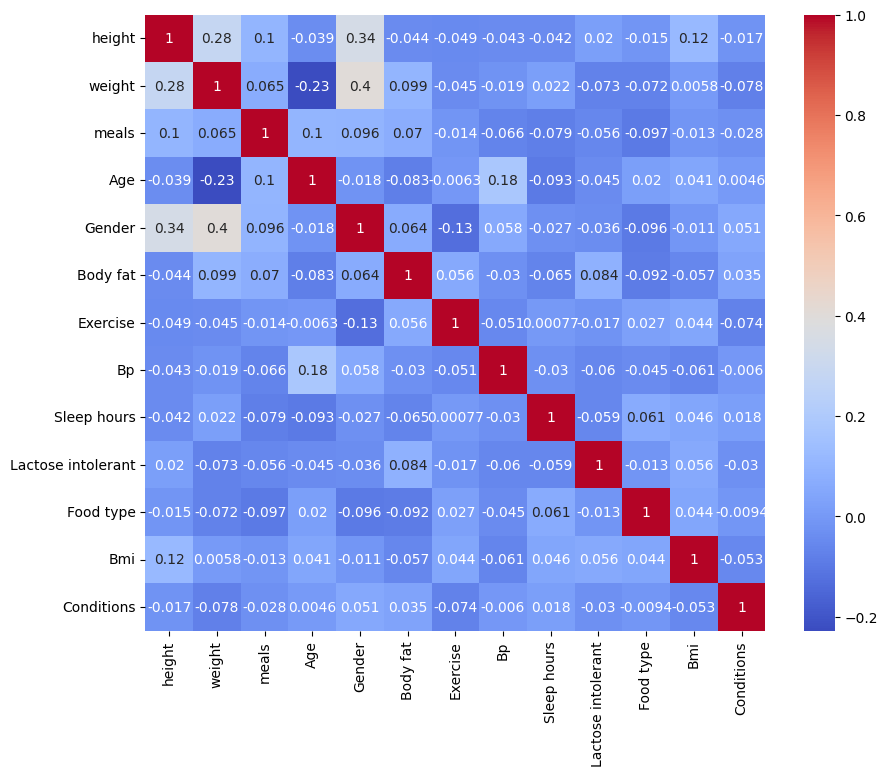

In [202]:
# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True,cmap="coolwarm")

In [203]:
# PCA
df2=df1.drop(columns="Bmi")

In [204]:
df2

,height,weight,meals,Age,Gender,Body fat,Exercise,Bp,Sleep hours,Lactose intolerant,Food type,Conditions
0,1.78,95,3,1,1,1,2,2,1,0,0,24
1,1.70,65,3,1,1,0,2,2,2,0,0,24
2,1.79,105,4,1,1,0,3,2,1,0,0,24
3,1.57,42,2,1,0,0,2,2,0,0,0,24
4,1.54,45,3,1,0,0,2,2,0,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...
541,1.60,68,3,0,1,0,2,2,2,0,0,24
542,1.57,75,2,0,0,0,3,2,2,0,0,24
543,1.58,61,2,0,1,0,3,2,2,0,0,24
544,1.60,60,3,0,1,0,0,2,2,1,0,24


In [205]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [206]:
scaled_data=ss.fit_transform(df2)

In [207]:
scaled_data

array([[ 0.71147379,  1.96314022,  0.25945836, ..., -0.32098334,
        -0.60019495,  0.22102197],
       [ 0.27634112, -0.06487673,  0.25945836, ..., -0.32098334,
        -0.60019495,  0.22102197],
       [ 0.76586537,  2.63914587,  1.55913054, ..., -0.32098334,
        -0.60019495,  0.22102197],
       ...,
       [-0.37635788, -0.33527899, -1.04021381, ..., -0.32098334,
        -0.60019495,  0.22102197],
       [-0.26757471, -0.40287956,  0.25945836, ...,  3.11542651,
        -0.60019495,  0.22102197],
       [ 6.25941531,  2.63914587,  5.45814707, ...,  3.11542651,
         0.59146484,  1.30576798]])

In [208]:
from sklearn.decomposition import PCA

In [209]:
pca=PCA(n_components=2)

In [210]:
pca_data=pca.fit_transform(scaled_data)

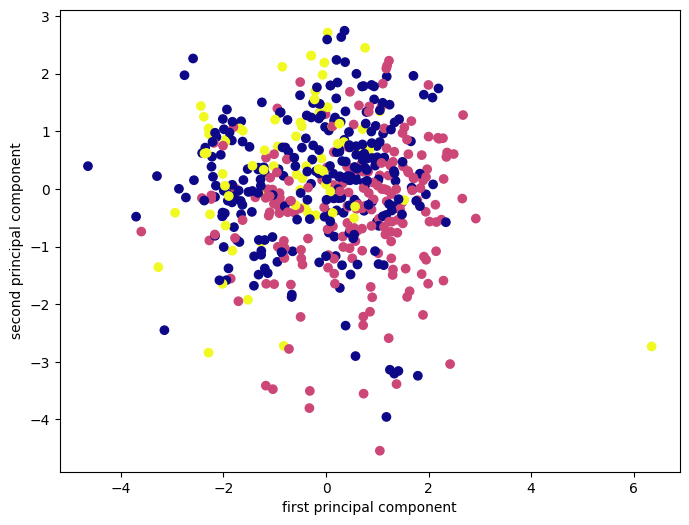

In [211]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0],pca_data[:,1],c=df1["Bmi"],cmap="plasma")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

In [212]:
# t-sne
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
tsne_data=tsne.fit_transform(df2)

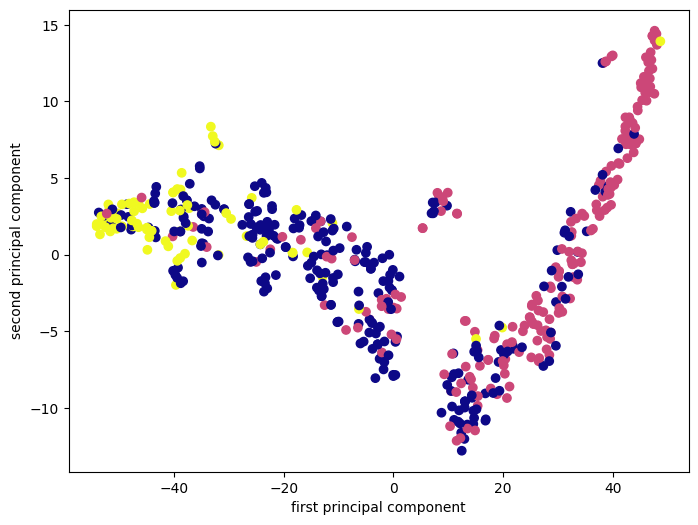

In [213]:
plt.figure(figsize=(8,6))
plt.scatter(tsne_data[:,0],tsne_data[:,1],c=df1["Bmi"],cmap="plasma")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

In [214]:
## Feature Selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [215]:
x=df1.drop(columns=["Bmi"])
y=df1["Bmi"]

In [216]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [217]:
sc=StandardScaler()
x_new_train=sc.fit_transform(xtrain)
x_new_test=sc.fit_transform(xtest)

In [218]:
x_new_train=pd.DataFrame(x_new_train,columns=xtrain.columns)
x_new_test=pd.DataFrame(x_new_test,columns=xtrain.columns)

In [219]:
knn=KNeighborsClassifier(n_neighbors=5)

In [220]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs=SequentialFeatureSelector(knn,n_features_to_select=5,scoring="accuracy",direction="forward",cv=5)

In [221]:
sfs

SequentialFeatureSelector(estimator=KNeighborsClassifier(),
                          n_features_to_select=5, scoring='accuracy')

In [222]:
sfs.fit(x_new_train,ytrain)

SequentialFeatureSelector(estimator=KNeighborsClassifier(),
                          n_features_to_select=5, scoring='accuracy')

In [223]:
indices_features=sfs.get_support(indices=True)

In [224]:
lst=[]
for i in indices_features:
    lst.append(df2.columns[i])

In [225]:
print(lst)

['height', 'weight', 'Gender', 'Body fat', 'Conditions']


In [226]:
# after applying feature selection height,weight,Body fat,Bp,Lactose intolerant are the most important features for the target columns

### Applying all algorithms 

In [227]:
# applying multinomial logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [228]:
model=LogisticRegression(multi_class="multinomial",solver="lbfgs")

In [229]:
model.fit(xtrain,ytrain)

C:\Users\pc\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\pc\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [230]:
model.score(xtest,ytest)

0.7727272727272727

In [231]:
# applying Svc
from sklearn.svm import SVC

In [232]:
p=SVC()

In [233]:
p.fit(xtrain,ytrain)

SVC()

In [234]:
p.score(x,y)

0.6941391941391941

In [235]:
from sklearn.model_selection import GridSearchCV
gr=GridSearchCV(estimator=p,param_grid={'kernel':['linear','poly','rbf','sigmoid']},scoring='accuracy',cv=5)

In [236]:
gr.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [237]:
gr.best_params_

{'kernel': 'linear'}

In [238]:
gr.best_score_

0.823380355276907

In [239]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [240]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [241]:
dt.score(xtest,ytest)

0.9090909090909091

In [242]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [243]:
knn.score(xtest,ytest)

0.7454545454545455

In [244]:
# after applying knn we get the accuracy of 74%

In [245]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [246]:
ypred=rf.predict(xtest)

In [247]:
ypred

array([2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 2, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0])

In [307]:
rf.score(xtest,ytest)

0.8636363636363636

In [308]:
# after applying randomforest getting 86% accuracy

In [248]:
#Bagging

In [249]:
mod=[SVC(),
    DecisionTreeClassifier(),
    LogisticRegression()]

In [250]:
trained_model=[]
for i in mod:
    m=i.fit(xtrain,ytrain)
    trained_model.append(m)

C:\Users\pc\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [251]:
scoree=[]
for i in trained_model:
    k=i.score(xtest,ytest)
    scoree.append(k)
scoree

[0.6727272727272727, 0.9, 0.7727272727272727]

In [252]:
# the modle accuracy after applying svc,DecisionTreeClassifier and logistic are 70%,90%,77% 

In [294]:
# applying gridsearchcv
estimators=[(SVC(), {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C':[1,10]}),
    (DecisionTreeClassifier(), {'max_depth': [3, 5, 7], 'criterion': ['gini', 'entropy']}),
    (LogisticRegression(),{'C': [0.01, 0.1, 1, 10, 100],'penalty': ['l2'],'solver': ['lbfgs', 'saga']})]
train_model=[]
for est,params in estimators:
    hr=GridSearchCV(estimator=est,param_grid=params,scoring='accuracy',cv=5)
    n=hr.fit(xtrain,ytrain)
    train_model.append(n)
train_model

C:\Users\pc\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

[GridSearchCV(cv=5, estimator=SVC(),
              param_grid={'C': [1, 10],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
              scoring='accuracy'),
 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
              param_grid={'criterion': ['gini', 'entropy'],
                          'max_depth': [3, 5, 7]},
              scoring='accuracy'),
 GridSearchCV(cv=5, estimator=LogisticRegression(),
              param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'saga']},
              scoring='accuracy')]

In [295]:
scorre=[]
for i in train_model:
    x=i.score(xtest,ytest)
    scorre.append(x)
scorre

[0.9090909090909091, 0.8636363636363636, 0.7727272727272727]

In [296]:
# so the majority model is Decision tree ,getting 91% accuracy

In [297]:
# stacking
from sklearn.ensemble import StackingClassifier
estimators=[("svs",SVC()),
           ("dt",DecisionTreeClassifier()),
           ("knn",knn)]
stack=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(multi_class="multinomial",solver="lbfgs"))

In [291]:
stack.fit(xtrain,ytrain)

C:\Users\pc\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


StackingClassifier(estimators=[('svs', SVC()), ('dt', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression(multi_class='multinomial'))

In [292]:
stack.score(xtest,ytest)

0.9090909090909091

In [293]:
# after applying stacking we get 90% accuracy

In [302]:
# cascading
from sklearn.multioutput import ClassifierChain
base_clf=DecisionTreeClassifier()
chain=ClassifierChain(base_clf)
Ytrain=pd.DataFrame(ytrain)

In [304]:
chain.fit(xtrain,Ytrain)

ClassifierChain(base_estimator=DecisionTreeClassifier())

In [305]:
chain.score(xtest,ytest)

0.9090909090909091

In [306]:
# getting 90% accuracy after applying cascading